# Week 6 Day 2 - EDA

1. Data Collection
2. Data Cleaning
3. Univariate Analysis
4. **Bivariate Analysis**
5. **Multivariate Analysis**
6. **Time Series Data**
7. **Dealing with Outliers and Missing Values**

### Titanic dataset
https://www.kaggle.com/c/titanic/data

This datset was made for machine learning but provides some very interesting visualizations. I renamed the 'training' set as 'passengers' and  'gender_submission' file as 'survived'

In [1]:
import pandas as pd
import pickle

pull in the titanic_clean.csv from last class

In [3]:
#reading files
# titanic_clean = pd.read_csv("titanic_clean.csv")

#or
with open('data/titanic_clean.pkl', 'rb') as f:
    titanicDf = pickle.load(f) # deserialize using load()


In [4]:
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q,None,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None,Adult
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None,Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None,Adult


[**seaborn**](https://seaborn.pydata.org)


Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. You can find more on their [github repo](https://github.com/mwaskom/seaborn). 

In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

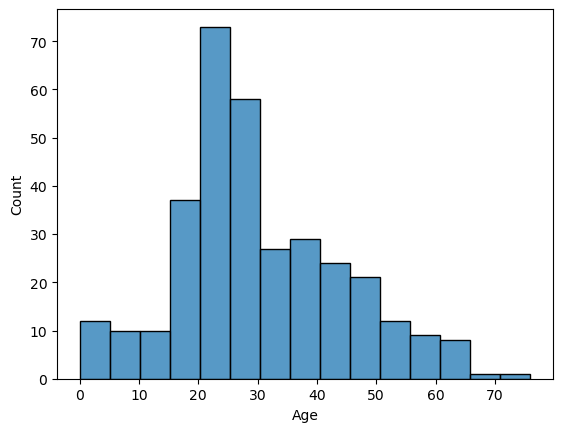

In [6]:
#use the histplot for a histogram

sns.histplot(titanicDf['Age'])


You can also add a  <u>kernel density estimate</u> - This function can normalize the statistic computed within each bin to estimate frequency. In statistics, kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation. KDE answers a fundamental data smoothing problem where inferences about the population are made based on a finite data sample. 

<Axes: xlabel='Age', ylabel='Count'>

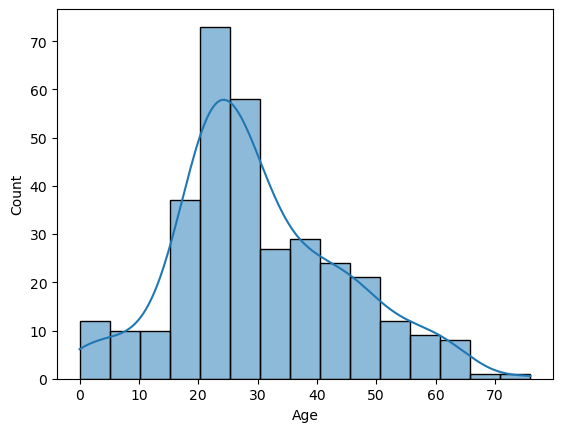

In [7]:
#add kde

sns.histplot(titanicDf['Age'], kde = True)


### Bivariate Analysis

**ScatterPlots**

A scatter plot identifies a possible relationship between changes observed in two different sets of variables. It provides a visual and statistical means to test the strength of a relationship between two variables

**Regression Plots**

**sns.regplot**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. 

<Axes: xlabel='Fare', ylabel='Age'>

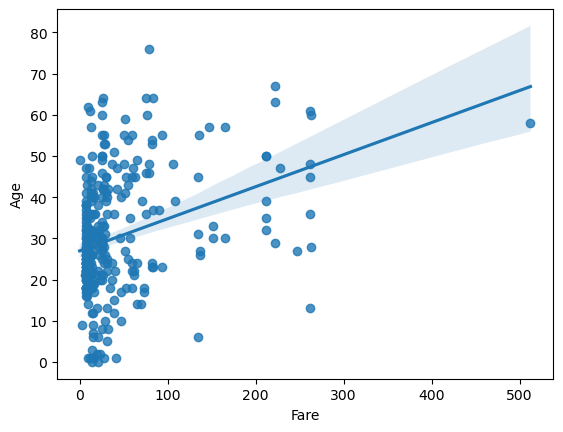

In [9]:
#plot fare and age

sns.regplot(
    x = "Fare",
    y = "Age",
    data = titanicDf
)


<Axes: xlabel='Age', ylabel='Fare'>

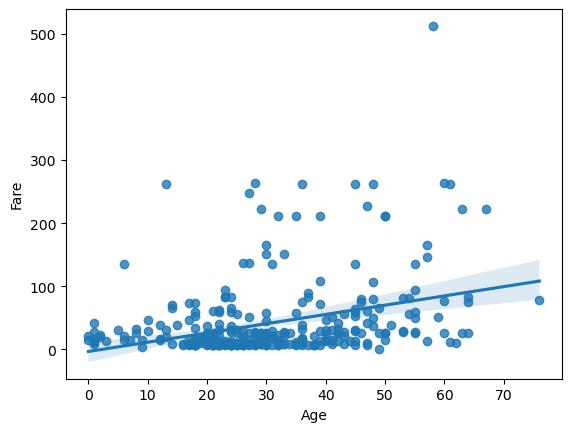

In [10]:
sns.regplot(
    x = "Age",
    y = "Fare",
    data = titanicDf
)

<Axes: xlabel='Pclass', ylabel='Fare'>

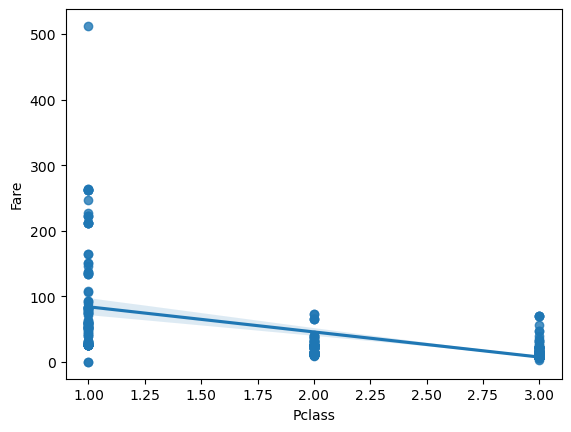

In [11]:
#plot plcass and fare

sns.regplot(
    x = "Pclass",
    y = "Fare",
    data = titanicDf
)


get rid of the outlier

In [12]:
#what datatype is it?

titanicDf["Fare"].dtype

dtype('float64')

In [14]:
#get is lesss than the outlier

fare_clean = titanicDf.loc[titanicDf["Fare"] < 400]
fare_clean.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q,None,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None,Adult
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None,Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None,Adult


<Axes: xlabel='Pclass', ylabel='Fare'>

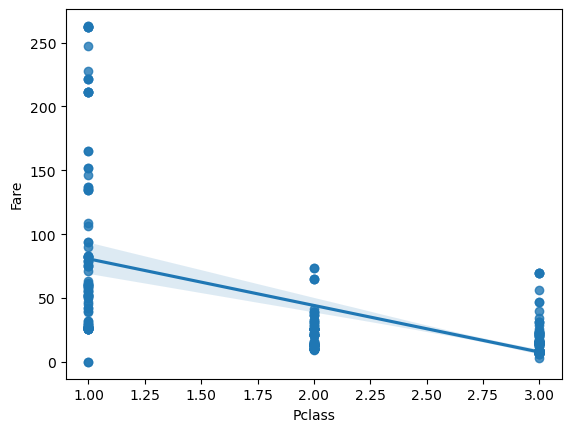

In [16]:
#try to plot it (fare and age)


sns.regplot(
    x = "Pclass",
    y = "Fare",
    data = fare_clean
)

<Axes: xlabel='Age', ylabel='Fare'>

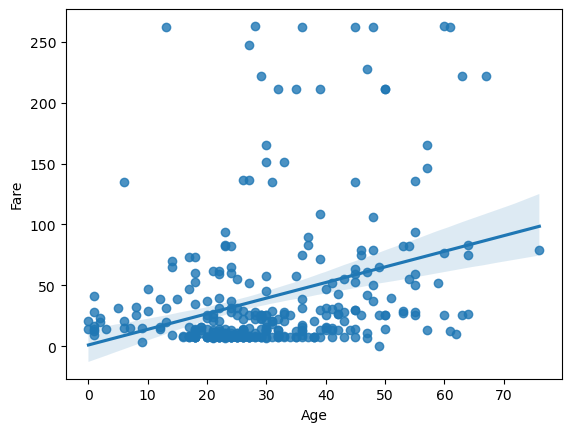

In [17]:
sns.regplot(
    x = "Age",
    y = "Fare",
    data = fare_clean
)

need to drop the other ones to match you can do it by just pulling form the clean df

[**Line Plots**](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

A line graph connects individual data points that, typically, display quantitative values over a specified time interval.

**relplot**
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use

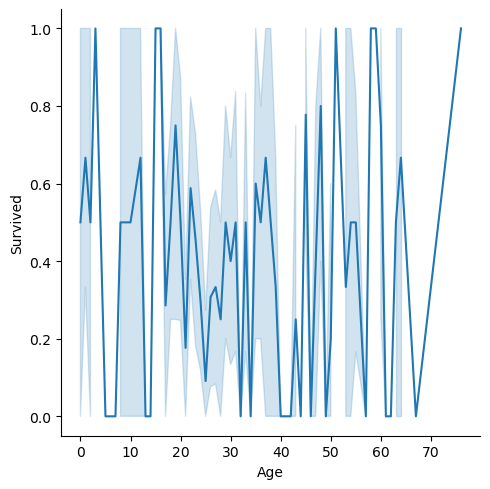

In [19]:
#plot age and survived

sns.relplot(
    x = "Age",
    y = "Survived",
    data = titanicDf,
    kind = 'line'
)

try to plot the inverse of them

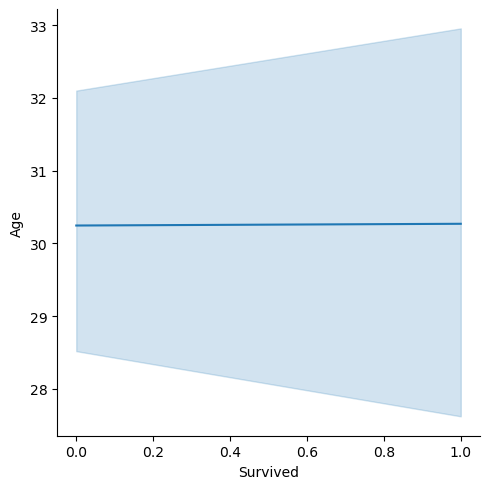

In [20]:
sns.relplot(
    x = "Survived",
    y = "Age",
    data = titanicDf,
    kind = 'line'
)

### [Box Plots](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

A box and whisker plot or diagram (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph.

<Axes: xlabel='Survived', ylabel='Age'>

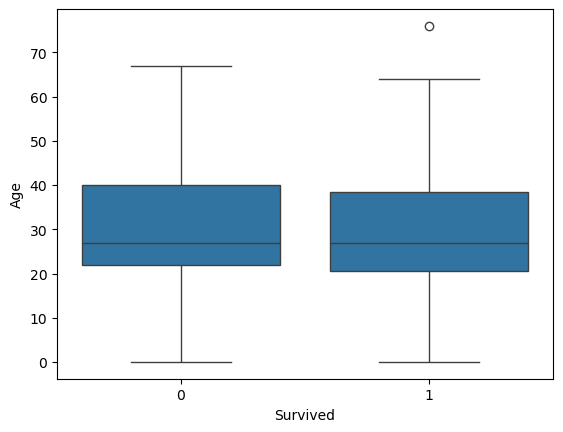

In [21]:
#plot survived and age

sns.boxplot(
    x = "Survived",
    y = "Age",
    data = titanicDf
)


<Axes: xlabel='Age', ylabel='Sex'>

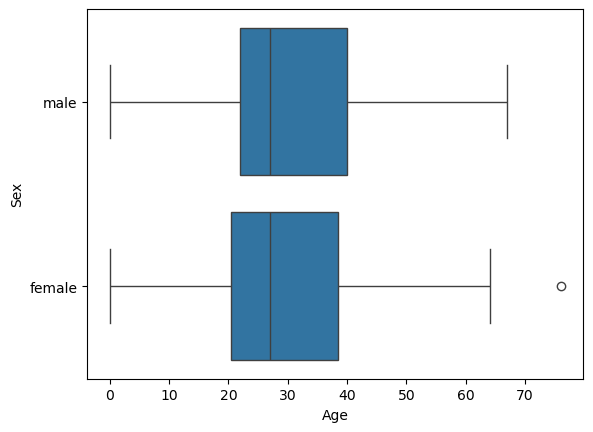

In [24]:
#plot sex and age

sns.boxplot(
    data = titanicDf, 
    x = "Age",
    y = "Sex"
)


<Axes: xlabel='Age', ylabel='Fare'>

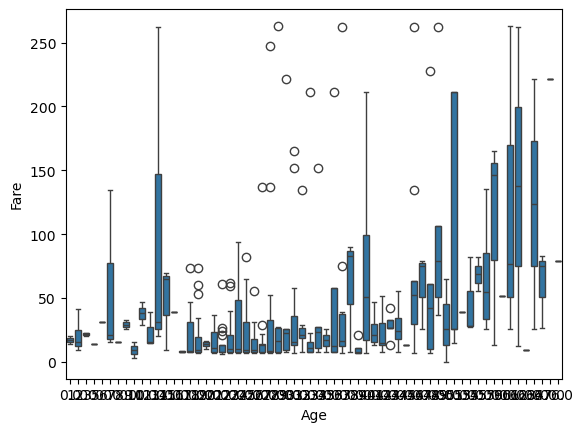

In [25]:
sns.boxplot(
    x = "Age",
    y = "Fare",
    data = fare_clean
)

## Exercise 1 

Lets compare the number of people in a group to the fare that they paid. (people were travling as families)
- SibSp - is a number of siblings
- Parch - do they have a parent/ number of parents

- See if the number of people on board is related to the number of rooms they have
- If we assume the Fare is total - then plot fare and number of rooms

In [26]:
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q,None,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None,Adult
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None,Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None,Adult


In [27]:
#find the total family

titanicDf['TotalFamily'] = titanicDf['SibSp'] + titanicDf['Parch'] + 1

titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup,TotalFamily
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q,None,Adult,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None,Adult,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None,Adult,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None,Adult,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None,Adult,3


In [38]:
hasCabinDf  = titanicDf[titanicDf["Cabin"].notnull()]

hasCabinDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup,TotalFamily
13,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,B,Adult,2
15,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,E,Adult,2
26,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,B,Adult,5
28,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,B,Adult,2
30,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,A,Adult,1


In [33]:
hasCabinDf['Cabin'].unique()

array(['B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34', 'D19',
       'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53', 'D43',
       'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

In [34]:
hasCabinDf['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

dtype('O')

In [52]:
# # hasCabinDf['NumofCabinsLyst'] = hasCabinDf['Cabin'].astype('str').tolist()
# hasCabinDf['NumofCabinsLyst'] = hasCabinDf['Cabin'].apply(lambda x: [x])

# # hasCabinDf['NumofCabinsLyst'].dtype

# hasCabinDf['NumofCabins'] = hasCabinDf['NumofCabinsLyst'].apply(len)
# hasCabinDf.head()

In [57]:
hasCabinDf['NumofCabinsLyst'] = hasCabinDf['Cabin'].str.split(' ')

hasCabinDf['NumofCabins'] = hasCabinDf['NumofCabinsLyst'].apply(len)
hasCabinDf.head()

/var/folders/48/lj976zdd4t3805fh_vyjylwr0000gn/T/ipykernel_79510/4199613220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasCabinDf['NumofCabinsLyst'] = hasCabinDf['Cabin'].str.split(' ')
/var/folders/48/lj976zdd4t3805fh_vyjylwr0000gn/T/ipykernel_79510/4199613220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasCabinDf['NumofCabins'] = hasCabinDf['NumofCabinsLyst'].apply(len)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup,TotalFamily,NumofCabins,NumofCabinsLyst
13,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,B,Adult,2,1,[B45]
15,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,E,Adult,2,1,[E31]
26,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,B,Adult,5,4,"[B57, B59, B63, B66]"
28,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,B,Adult,2,1,[B36]
30,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,A,Adult,1,1,[A21]


<Axes: xlabel='Fare', ylabel='NumofCabins'>

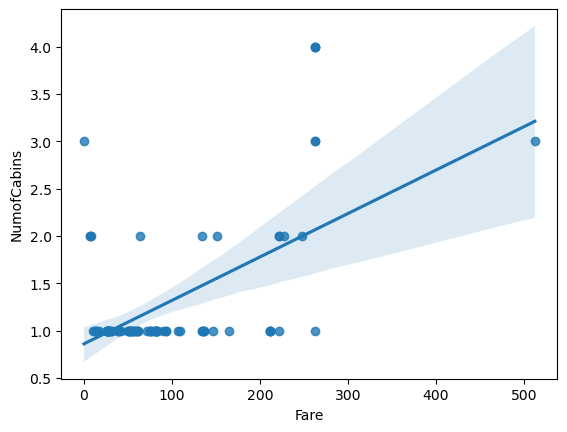

In [58]:
sns.regplot(
    x = "Fare",
    y = 'NumofCabins',
    data = hasCabinDf
)

<Axes: xlabel='NumofCabins', ylabel='Fare'>

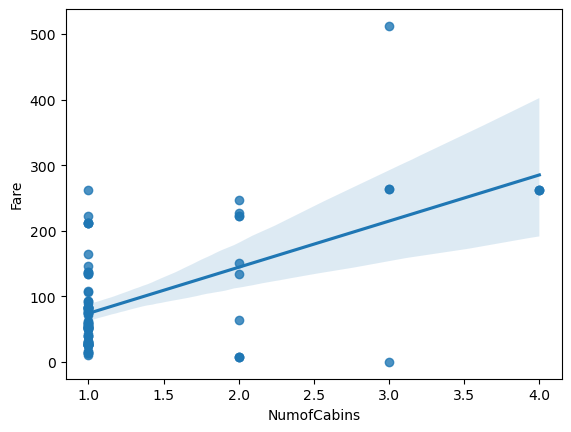

In [59]:
sns.regplot(
    x = "NumofCabins",
    y = 'Fare',
    data = hasCabinDf
)

### Multivariate Analysis

**Pivot Tables**

A PivotTable is an interactive way to quickly summarize large amounts of data. You can use a PivotTable to analyze numerical data in detail, and answer unanticipated questions about your data.


In [60]:
import numpy as np

In [61]:
#checkout the data again

titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup,TotalFamily
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q,None,Adult,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None,Adult,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None,Adult,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None,Adult,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None,Adult,3


In [62]:
# lets make a pivot table of both age and sex
#autotmaticallly aggigrages  by mean

titanicDf.pivot_table(values = "Age", index = "Sex")

,Age
Sex,
female,30.267717
male,30.243902


**aggfunc**

aggfuncfunction, list of functions, dict, default “mean”

If a list of functions is passed, the resulting pivot table will have hierarchical columns whose top level are the function names (inferred from the function objects themselves). If a dict is passed, the key is column to aggregate and the value is function or list of functions. If margin=True, aggfunc will be used to calculate the partial aggregates.

In [63]:
# group them by the aggregates values of the sum of all of those values- names with the same age
# lists with the same number
# how many of the same one 

titanicDf.pivot_table(values = "Age", index = "Sex", aggfunc = np.sum)


/var/folders/48/lj976zdd4t3805fh_vyjylwr0000gn/T/ipykernel_79510/1995274641.py:5: FutureWarning: The provided callable <function sum at 0x106ae4cc0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  titanicDf.pivot_table(values = "Age", index = "Sex", aggfunc = np.sum)


,Age
Sex,
female,3844.0
male,6200.0


In [64]:
# group them by mean and median

titanicDf.pivot_table(values = "Age", index = "Sex", aggfunc = [np.mean, np.median])

/var/folders/48/lj976zdd4t3805fh_vyjylwr0000gn/T/ipykernel_79510/4245802605.py:3: FutureWarning: The provided callable <function mean at 0x106ae5da0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  titanicDf.pivot_table(values = "Age", index = "Sex", aggfunc = [np.mean, np.median])
/var/folders/48/lj976zdd4t3805fh_vyjylwr0000gn/T/ipykernel_79510/4245802605.py:3: FutureWarning: The provided callable <function median at 0x106c20ae0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  titanicDf.pivot_table(values = "Age", index = "Sex", aggfunc = [np.mean, np.median])


,mean,median
,Age,Age
Sex,,
female,30.267717,27.0
male,30.243902,27.0


In [65]:
#add the element of age group 
#where the values are the Fare
#index is Sex
#and columns are age group

titanicDf.pivot_table(values = "Fare", index = "Sex", columns = "AgeGroup")

/var/folders/48/lj976zdd4t3805fh_vyjylwr0000gn/T/ipykernel_79510/889194588.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanicDf.pivot_table(values = "Fare", index = "Sex", columns = "AgeGroup")


AgeGroup,Minor,Adult,Senior
Sex,,,
female,21.600521,64.186801,78.8500
male,35.978761,29.899682,221.7792


**lmplot**

lmplot() combines regplot() and FacetGrid.

The FacetGrid class helps in visualizing the distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

lmplot() is more computationally intensive and is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

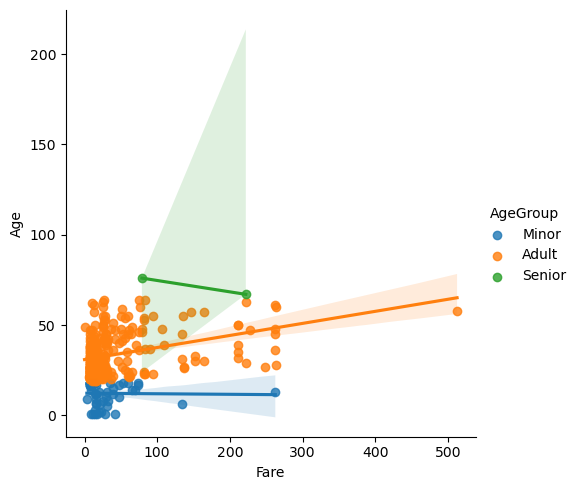

In [69]:
#plot fare, age, and agegroup

sns.lmplot(
    x = "Fare",
    y = "Age",
    hue = "AgeGroup",
    data = titanicDf
)

[**heatmaps**](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Plot rectangular data as a color-encoded matrix.

Heatmaps (or heat maps) are visual representations of data where values are depicted by color, making it easy to visualize complex data and understand it at a glance. Heatmaps can be created by hand, though modern heatmaps are generally created using specialized heatmapping software.


In [70]:
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinCode,AgeGroup,TotalFamily
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q,None,Adult,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None,Adult,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None,Adult,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None,Adult,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None,Adult,3


In [71]:
#make a subset of the titanic_clean with two variables

subset = titanicDf[['PassengerId', 'Age']]

<Axes: >

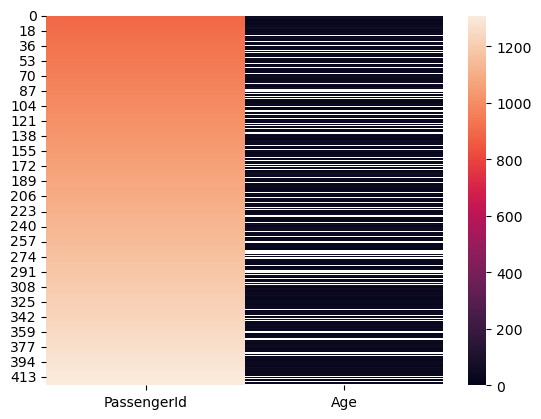

In [72]:
#make the heatmap

sns.heatmap(subset)

In [73]:
subset.head()

,PassengerId,Age
0,892,34.0
1,893,47.0
2,894,62.0
3,895,27.0
4,896,22.0


In [74]:
#set the index

subset = subset.set_index("PassengerId")

In [76]:
subset

,Age
PassengerId,
892,34.0
893,47.0
894,62.0
895,27.0
896,22.0
...,...
1305,NaN
1306,39.0
1307,38.0


<Axes: ylabel='PassengerId'>

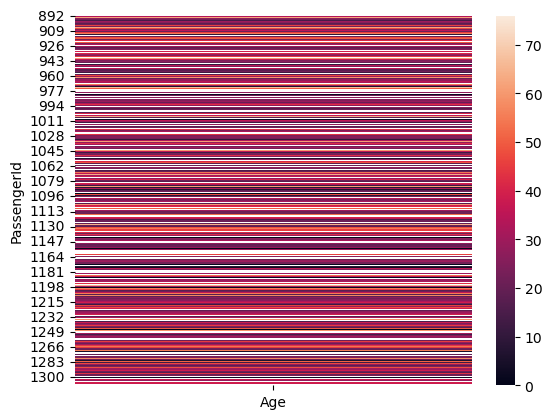

In [75]:
#map it again

sns.heatmap(subset)

In [78]:
# add another variable

subset = titanicDf[["PassengerId", "Age", "Fare"]]
subset = subset.set_index('PassengerId')
subset.head()

,Age,Fare
PassengerId,,
892,34.0,7.8292
893,47.0,7.0000
894,62.0,9.6875
895,27.0,8.6625
896,22.0,12.2875


<Axes: ylabel='PassengerId'>

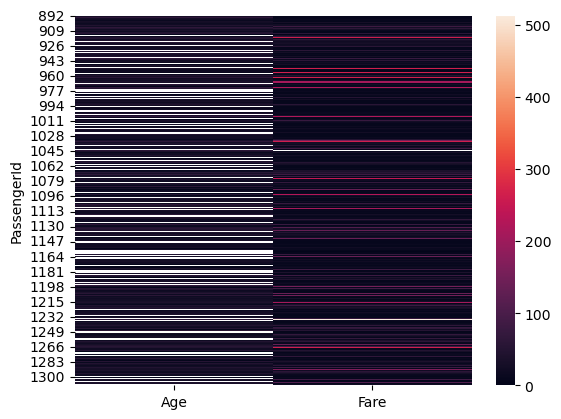

In [79]:
sns.heatmap(subset)

<Axes: ylabel='PassengerId'>

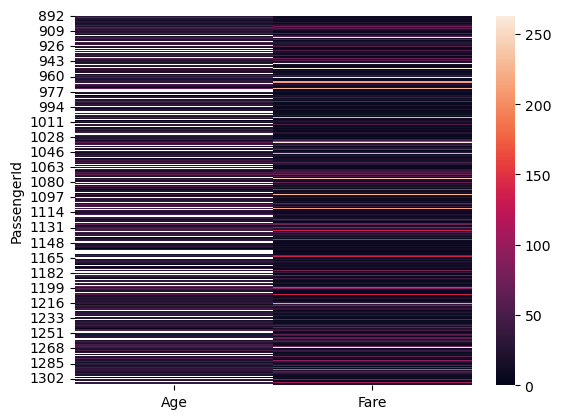

In [80]:
#clean it up a tad

subset = fare_clean[["PassengerId", "Age", "Fare"]]
subset = subset.set_index('PassengerId')
sns.heatmap(subset)

#### Dealing with Outliers and Missing Values

##### <u>Remember:</u>

**Removing Outliers-------------**

The outlier affects both results and assumptions
In some cases, removing outliers may be perceived as data manipulation or cherry-picking results to support a particular narrative.

Treat outliers like children … correct them when needed but never throw them out. Environmental field data (water, air, soils, rock, biota) are usually skewed distributions, not following a normal distribution. There are physical reasons for this. Outliers are to be expected.

**Managing Missing Data----------------**

They reduce the sample size and statistical power. More missing data means a higher chance of bias. It also makes it harder to draw reliable conclusions.

Deletion is the most frequently used method in handling missing data, and thus has become the default option for analysis in most statistical software packages. A deletion is known to produce unbiased estimates and conservative results. 

Note:

*Cannot convert non-finite values (NA or inf) to integer*

*Missing data Can be represented as NA , nan , 0 , . ...*

In [42]:
# Return missing values in the Age column


In [43]:
# Get summary of missingness


[**missingno**](https://github.com/ResidentMario/missingno)

missingno (shorthand msno) is a glitch Pokemon. It's also the name of a Python library for the exploratory visualization of missing data.

missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset.

In [ ]:
#if you need it
# pip install missingno

In [ ]:
import missingno as msno

[**matplotlib**](https://matplotlib.org/stable/users/index.html)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

[**matplotlib.pyplot**](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation

In [116]:
import matplotlib.pyplot as plt

In [44]:
#check out the missingno for the whole dataset


#### Dropping missing data

In [45]:
#drop the na from age


In [46]:
#what percentage of the na subset


#### Replacing with statistical measures

In [47]:
#get the age mean


In [48]:
#fill the na with the average


In [49]:
#check for missing values


In [50]:
#Now we try to convert the age to integer


In [51]:
# look at dtypes


In [52]:
#plotting age - histogram


### Timeseries Analysis

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.

Weather records, economic indicators and patient health evolution metrics—all are time series data.

this should look familiar. [wikifunctions](https://github.com/brianckeegan/wikifunctions) is a coding package from Professor Brian Keegan here at C U Boulder

In [19]:
import wikifunctions as wf

get all of the page views of a page over time

In [53]:
#plot it

Compare two pagess

In [54]:
#plot both


We need to change the scale 

Scales are functions that map from an input domain to an output range. The values in any dataset are unlikely to correspond exactly to pixel measurements for use in your visualization. Scales provide a convenient way to map those data values to new values useful for visualization purposes.

**linear scale**

Linear charts become useful when you want to see the pure price changes with scaling calculations. Day traders often prefer linear charts. -- this is what you automatically look at. 

**log scale**

A logarithmic scale, often called a log scale, shows the percentage (relative) change. If an asset rises from 50 to 60, a rise of 20%, it’s presented in the same way as a change from 10 000 to 12 000 (also a 20% rise). The distance between the lower numbers is higher than the upper numbers. Why does it change? Because the log scale shows the percentage changes (relative changes) – not absolute changes. A rise from 120 to 140 is much bigger relatively than a rise from 320 to 340, even though both rise 20 points.

A logarithmic scale can easily render values from 10 to 100000 on the same chart. In contrast, if you use any other conventional chart, such as a simple line series with a linear axis, you will not notice details correlating with the smallest values, which could lead to misinterpretation of the data set.


In [55]:
#we're going to use more of matplotlib
#f is for figure
#ax is the keyword for the part of the overall figure in which a chart/plot is drawn. 

#get both of the plots


#set a new scale

#include a legend


Get the revisions of a page

**pd.groupby**

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [56]:
#group the revisions by month



### Save our Image(s)

pandas save fig - fig.savefig()

In [57]:
#get the monthly revision data from before 


matplotlib save fig - plt.savefig()

In [58]:


#save the image
